In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df = pd.read_csv('./hcv.csv')

descriptive_stats = df.describe()
print("statistik deskriptif")
print(descriptive_stats)

statistik deskriptif
       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std   

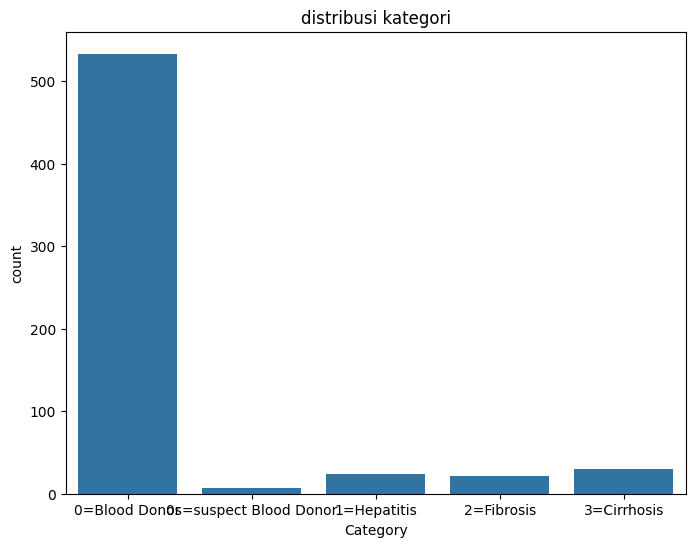

In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category', data=df)
plt.title("distribusi kategori")
plt.show()

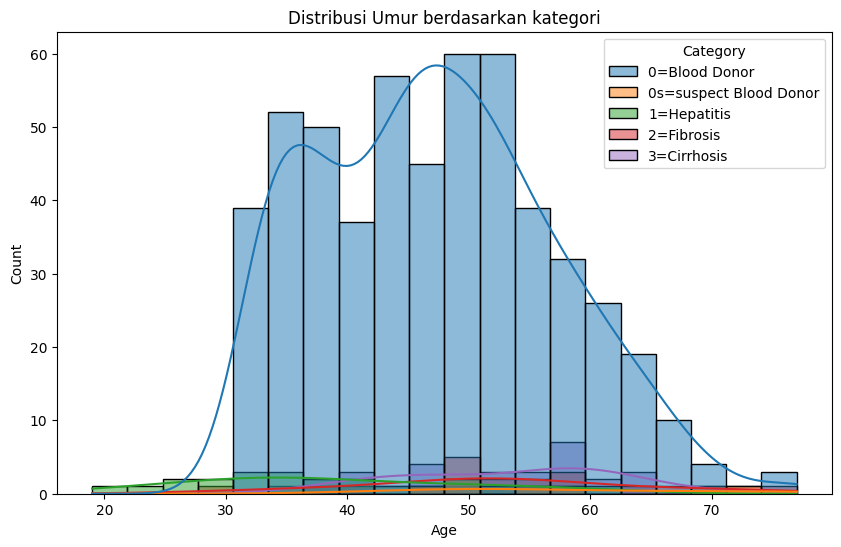

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Category", kde=True, bins=20)
plt.title("Distribusi Umur berdasarkan kategori")
plt.show()

In [5]:
label_counts = df["Category"].value_counts()
label_counts

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

# PreProcessing

## Normalisasi untuk Data Training

In [25]:
nan_info = df.isnull().sum()
nan_columns = nan_info[nan_info > 0]
print("fitur dengan nilai NaN")
nan_columns
df = df.dropna()
nan_columns

fitur dengan nilai NaN


Series([], dtype: int64)

In [26]:
df['Sex'] = df["Sex"].replace(['m', 'f'], [0,1])
df.to_csv('data_cleaned.csv', index=False)
cleaned_df = pd.read_csv("data_cleaned.csv")
cleaned_df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,3=Cirrhosis,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
585,610,3=Cirrhosis,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
586,611,3=Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
587,612,3=Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [27]:
# Normalisasi

X = cleaned_df.drop(columns=["Category"])
y = cleaned_df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
binary_columns = ["Sex"]
scaler = StandardScaler()
non_binary_columns = [ col for col in X_train.columns if col not in binary_columns]
scaler.fit(X_train[non_binary_columns])
pickle.dump(scaler, open('scaler.pkl', 'wb'))
X_train_scaled = X_train.copy()
X_train_scaled[non_binary_columns] = scaler.transform(X_train[non_binary_columns])
X_train_scaled

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
67,-1.341643,-1.078006,0,0.359748,0.145468,1.196471,0.272916,0.144231,0.002844,-0.443225,-0.222487,0.920313,0.662574
39,-1.504569,-1.280899,0,0.517924,0.050849,-0.031716,-0.258231,-0.320879,0.898895,-0.612767,0.023108,-0.325948,-0.896521
214,-0.480463,0.443695,0,0.113697,0.122759,1.025890,-0.298210,-0.133766,1.717227,0.814951,0.309635,0.379929,0.214334
458,0.968413,0.443695,1,0.693675,0.349845,-0.080453,-0.183985,-0.342263,0.226857,0.591870,-0.324818,-0.197607,-0.253394
421,0.747299,0.037908,1,-0.413555,-0.679609,-0.562955,-0.449559,-0.187227,0.464585,1.145111,-0.222487,-0.401939,-0.019530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.975060,-0.367879,0,0.517924,0.932697,0.031643,-0.246809,-0.304841,-0.166309,-0.701999,0.555230,-0.393496,0.974393
144,-0.887778,-0.266432,0,0.482774,0.096266,-0.533713,-0.509527,-0.203265,-0.070303,-0.023833,0.043574,-0.341146,-0.097485
72,-1.312549,-0.976559,0,0.693675,-0.709887,-0.514218,-0.323911,-0.010806,0.263430,0.449098,0.452899,-0.442468,0.837972
235,-0.358269,0.646588,0,0.939726,0.217378,0.455660,0.527067,-0.267418,0.313719,-0.157682,0.104973,-0.114860,1.461610


In [28]:
normalized_data = pd.DataFrame(X_train_scaled, columns=X.columns)
normalized_data.to_csv('normalized_data_train.csv', index=False)
normalized_data_train = pd.read_csv('normalized_data_train.csv')
normalized_data_train

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.341643,-1.078006,0,0.359748,0.145468,1.196471,0.272916,0.144231,0.002844,-0.443225,-0.222487,0.920313,0.662574
1,-1.504569,-1.280899,0,0.517924,0.050849,-0.031716,-0.258231,-0.320879,0.898895,-0.612767,0.023108,-0.325948,-0.896521
2,-0.480463,0.443695,0,0.113697,0.122759,1.025890,-0.298210,-0.133766,1.717227,0.814951,0.309635,0.379929,0.214334
3,0.968413,0.443695,1,0.693675,0.349845,-0.080453,-0.183985,-0.342263,0.226857,0.591870,-0.324818,-0.197607,-0.253394
4,0.747299,0.037908,1,-0.413555,-0.679609,-0.562955,-0.449559,-0.187227,0.464585,1.145111,-0.222487,-0.401939,-0.019530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.975060,-0.367879,0,0.517924,0.932697,0.031643,-0.246809,-0.304841,-0.166309,-0.701999,0.555230,-0.393496,0.974393
467,-0.887778,-0.266432,0,0.482774,0.096266,-0.533713,-0.509527,-0.203265,-0.070303,-0.023833,0.043574,-0.341146,-0.097485
468,-1.312549,-0.976559,0,0.693675,-0.709887,-0.514218,-0.323911,-0.010806,0.263430,0.449098,0.452899,-0.442468,0.837972
469,-0.358269,0.646588,0,0.939726,0.217378,0.455660,0.527067,-0.267418,0.313719,-0.157682,0.104973,-0.114860,1.461610


## Balancing Data

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [31]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data["Category"] = y_resampled
resampled_data.to_csv('balanced_data_train.csv')

In [32]:
balanced_data_train = pd.read_csv('balanced_data_train.csv')
balanced_data_train

,Unnamed: 0.1,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,0,-1.341643,-1.078006,0,0.359748,0.145468,1.196471,0.272916,0.144231,0.002844,-0.443225,-0.222487,0.920313,0.662574,0=Blood Donor
1,1,-1.504569,-1.280899,0,0.517924,0.050849,-0.031716,-0.258231,-0.320879,0.898895,-0.612767,0.023108,-0.325948,-0.896521,0=Blood Donor
2,2,-0.480463,0.443695,0,0.113697,0.122759,1.025890,-0.298210,-0.133766,1.717227,0.814951,0.309635,0.379929,0.214334,0=Blood Donor
3,3,0.968413,0.443695,1,0.693675,0.349845,-0.080453,-0.183985,-0.342263,0.226857,0.591870,-0.324818,-0.197607,-0.253394,0=Blood Donor
4,4,0.747299,0.037908,1,-0.413555,-0.679609,-0.562955,-0.449559,-0.187227,0.464585,1.145111,-0.222487,-0.401939,-0.019530,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2125,1.748130,1.052375,0,-1.854712,2.806151,-0.967477,4.216542,2.507204,-2.223569,-1.299856,-0.296165,3.946463,1.227746,3=Cirrhosis
2126,2126,1.829593,1.661055,1,-2.206213,0.694258,-1.138058,1.852080,1.972594,-2.968754,-1.558630,-0.290025,0.408637,1.987805,3=Cirrhosis
2127,2127,1.742311,0.849481,0,-2.030463,-1.080793,-1.264776,1.318077,5.768320,-2.868177,-3.521742,-0.032151,-0.378298,-3.430051,3=Cirrhosis
2128,2128,1.730673,0.849481,0,-2.557715,0.459603,-0.480101,8.157313,1.384524,-3.078474,-1.638939,-0.285932,0.906803,-1.266806,3=Cirrhosis


In [33]:
balanced_data_train["Category"].value_counts()

Category
0=Blood Donor             426
0s=suspect Blood Donor    426
1=Hepatitis               426
3=Cirrhosis               426
2=Fibrosis                426
Name: count, dtype: int64

## Normalisasi Untuk Data Testing

In [34]:
with open('scaler.pkl', 'rb') as standarisasi:
    loadscale = pickle.load(standarisasi)

X_test_scaled = X_test.copy()
X_test_scaled[non_binary_columns] = loadscale.transform(X_test[non_binary_columns])

normalized_data_test = pd.DataFrame(X_test_scaled, columns=X.columns)

normalized_data_test.to_csv('normalized_data_test.csv', index=False)

normal_data_test = pd.read_csv('normalized_data_test.csv')
normal_data_test

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.259352,1.255268,1,-0.185079,0.645056,-0.041463,-0.186841,-0.288802,0.203998,-0.425379,-0.468081,-0.336080,-0.019530
1,1.637573,0.950928,1,0.254298,-0.637976,-0.904118,0.047321,0.368767,0.208570,0.725719,-0.193834,-0.204361,1.987805
2,-1.597669,-1.382346,0,0.324598,-0.865062,3.457894,0.344307,0.010579,-0.074875,-1.567553,-0.202020,-0.079398,-0.428793
3,1.561929,-0.164985,0,0.605799,-1.591735,-0.182802,2.594544,0.315306,-0.541187,-1.219547,-0.416916,0.543733,0.233823
4,-1.207811,-0.875112,0,0.746400,-0.244362,-0.299772,-0.323911,1.838942,0.208570,-0.532458,-0.079223,-0.407005,0.721040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-1.254361,-0.875112,0,0.957301,-0.092972,-0.099948,-0.144006,-0.032190,0.862321,0.788181,-0.161088,0.165464,1.286212
114,0.997507,0.443695,1,1.748179,0.486096,-0.026842,-0.386735,-0.176535,-0.646336,0.466945,0.145905,-0.400251,2.026782
115,1.020782,0.545141,1,0.148847,-0.528219,-0.290025,0.235793,-0.181881,-0.710340,-0.996466,-0.283885,-0.435713,-0.175440
116,0.235247,-1.382346,1,-0.940808,0.073558,-0.611693,-0.358179,-0.395724,0.761744,0.190324,-0.324818,-0.212805,0.487176


## Modelling using SVM

In [38]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", C=1.0, random_state=42, class_weight="balanced")
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [40]:
svm_model_file_path = 'svm_model.pkl'
with open(svm_model_file_path, 'wb') as svm_model_file:
    pickle.dump(svm_model, svm_model_file)

with open(svm_model_file_path, 'rb') as svm_model_file:
    loaded_svm_model = pickle.load(svm_model_file)

y_pred_svm = loaded_svm_model.predict(X_test_scaled)
svm_accurary = accuracy_score(y_test, y_pred_svm)
print('akurasi svm : ', svm_accurary)

akurasi svm :  0.9152542372881356
